**PROJECT: TELCO CUSTOMER CHURN ANALYSIS**

**Import Libraries**

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Exploration**

In [211]:
# load the Dataset
customer_churn_df = pd.read_excel('src/Telco_customer_churn.xlsx')
customer_churn_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [212]:
customer_churn_df.columns = customer_churn_df.columns.str.replace(' ', '_')

**Dataset Overview**

**1. What is the total number of rows and columns in the dataset?**

In [213]:
customer_churn_df.shape

(7043, 33)

- There are **33** columns and **7043** rows(entries) in this dataset.

**2. What are the data types of each column?**

In [214]:
customer_churn_df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip_Code               int64
Lat_Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Label           object
Churn_Value            int64
Churn_Score            int64
CLTV                   int64
Churn_Reason          object
dtype: object

**3. Which columns are categorical, numerical, or binary?**

In [215]:
numerical_columns = customer_churn_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:\n", numerical_columns)

categorical_columns = customer_churn_df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:\n", categorical_columns)

binary_columns = [col for col in customer_churn_df.columns if customer_churn_df[col].nunique() == 2]
print("\nBinary Columns:\n", binary_columns)

Numerical Columns:
 ['Count', 'Zip_Code', 'Latitude', 'Longitude', 'Tenure_Months', 'Monthly_Charges', 'Churn_Value', 'Churn_Score', 'CLTV']

Categorical Columns:
 ['CustomerID', 'Country', 'State', 'City', 'Lat_Long', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Total_Charges', 'Churn_Label', 'Churn_Reason']

Binary Columns:
 ['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Paperless_Billing', 'Churn_Label', 'Churn_Value']


**4. Are there irrelevant columns (e.g., customerID) that should be dropped?**

In [216]:
if "CustomerID" in customer_churn_df.columns:
    print("\nIrrelevant column detected: CustomerID (likely to drop).")


Irrelevant column detected: CustomerID (likely to drop).


**5. How many unique values are there in each categorical variable?**

In [217]:
unique_counts_cat = customer_churn_df[categorical_columns].nunique().sort_values(ascending=False)
print("Unique Value Counts for Categorical Columns:\n",unique_counts_cat)

Unique Value Counts for Categorical Columns:
 CustomerID           7043
Total_Charges        6531
Lat_Long             1652
City                 1129
Churn_Reason           20
Payment_Method          4
Internet_Service        3
Device_Protection       3
Streaming_Movies        3
Contract                3
Tech_Support            3
Streaming_TV            3
Online_Backup           3
Multiple_Lines          3
Online_Security         3
Gender                  2
Phone_Service           2
Dependents              2
Partner                 2
Senior_Citizen          2
Paperless_Billing       2
Churn_Label             2
Country                 1
State                   1
dtype: int64


**Data Quality Checks**

**1. Are there missing values in any column?**

In [218]:
print("\nMissing Values in Each Column:")
customer_churn_df.isnull().sum()


Missing Values in Each Column:


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip_Code                0
Lat_Long                0
Latitude                0
Longitude               0
Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure_Months           0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges           0
Churn_Label             0
Churn_Value             0
Churn_Score             0
CLTV                    0
Churn_Reason         5174
dtype: int64

- There are **5174** missing values out of **7043** entries in **Churn_Reason** column.

**2. Are there blank spaces stored as empty strings?**

In [219]:
blank_counts = (customer_churn_df.astype(str).apply(lambda x: x.str.strip().eq('').sum()))
print("\nBlank Values in Each Column:\n", blank_counts[blank_counts > 0])


Blank Values in Each Column:
 Total_Charges    11
dtype: int64


- Only **Total_Charges** column has **11** blank spaces stored as empty strings.

**3. Does TotalCharges contain non-numeric values?**

In [220]:
# checking column type
print("\nData Type of 'Total Charges':", customer_churn_df['Total_Charges'].dtype)

# converting to numeric
customer_churn_df['TotalCharges_numeric'] = pd.to_numeric(customer_churn_df['Total_Charges'], errors='coerce')

# Reporting how many values failed conversion
n_coerced = customer_churn_df['TotalCharges_numeric'].isna().sum()
print(f"Non-numeric/missing after conversion: {n_coerced}")

# If any coercion happened, display them
if n_coerced > 0:
    print("\nProblematic values:")
    print(customer_churn_df.loc[customer_churn_df['TotalCharges_numeric'].isna(), 'Total_Charges'].unique())


Data Type of 'Total Charges': object
Non-numeric/missing after conversion: 11

Problematic values:
[' ']


- Yes. **Total_Charges** column contains **11** non-numeric entries, which are stored as **blank spaces (' ')**.

**4. Are there duplicate customerID entries?**

In [221]:
dup_cust_id_count = customer_churn_df['CustomerID'].duplicated().sum()
print("Number of duplicate CustomerID entries:", dup_cust_id_count)

Number of duplicate CustomerID entries: 0


- No, there are **0** duplicate entries in CustomerID col.

**5. Is TotalCharges approximately equal to MonthlyCharges × tenure? (Sanity Check)**

In [222]:
customer_churn_df['calc_total'] = customer_churn_df['Monthly_Charges'] * customer_churn_df['Tenure_Months']
customer_churn_df['total_diff'] = (customer_churn_df["TotalCharges_numeric"] - customer_churn_df['calc_total']).abs()

print("Distribution of Differences:")
customer_churn_df['total_diff'].describe()


Distribution of Differences:


count    7032.000000
mean       45.089157
std        49.899711
min         0.000000
25%         9.437500
50%        28.650000
75%        63.700000
max       373.250000
Name: total_diff, dtype: float64

- **Sanity Check:**
I compared Total_Charges with Monthly_Charges × Tenure_Months. The values are **approximately related but not exactly equal**. The **average difference** is about **45 units**, with **most customers showing differences under 64 units**. This indicates that while Total_Charges is generally proportional to Monthly_Charges and Tenure_Months, it may also include other billing adjustments (e.g., taxes, partial months, or additional services).

**Data Cleaning and Preparation**

In [223]:
# handling TotalCharges_numeric NaNs

customer_churn_df['TotalCharges_numeric'] = customer_churn_df['TotalCharges_numeric'].fillna(0) # filling with 0, bcz these customers haven't paid any bill yet (new customer)
print("\nCheck non-numeric values again: ", customer_churn_df['TotalCharges_numeric'].isna().sum())


# handling Churn_Reason col missing values

customer_churn_df['Churn_Reason'] = customer_churn_df['Churn_Reason'].fillna("Not Applicable") # missing for customers whose churn=0
print("\nCheck Missing values in Churn_Reason again: ",customer_churn_df['Churn_Reason'].isnull().sum())

# dropping CustomerID - unique identifier, useless for ml

customer_churn_df = customer_churn_df.drop(columns=['CustomerID'])
print("\nCheck columns: ", customer_churn_df.columns.tolist())

# check duplicates

print("\nDuplicate rows:", customer_churn_df.duplicated().sum())



Check non-numeric values again:  0

Check Missing values in Churn_Reason again:  0

Check columns:  ['Count', 'Country', 'State', 'City', 'Zip_Code', 'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value', 'Churn_Score', 'CLTV', 'Churn_Reason', 'TotalCharges_numeric', 'calc_total', 'total_diff']

Duplicate rows: 0


**After Data Cleaning**

- **No non-numeric** values remain in **TotalCharges_numeric**. Missing entries were filled with **0**, as these customers are new and have not paid any bills yet.
- **No missing values** are left in **Churn_Reason**. The missing entries were replaced with **"Not Applicable"**, since customers who have not churned naturally do not have a churn reason.
- **CustomerID** column was **dropped** because it is just an identifier and does not provide any useful information for analysis or machine learning models.
- **No duplicate rows** were found in the dataset.

**Target Variable Analysis**

**1. What is the churn rate (%)?**


Churn Counts:
 Churn_Label
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%


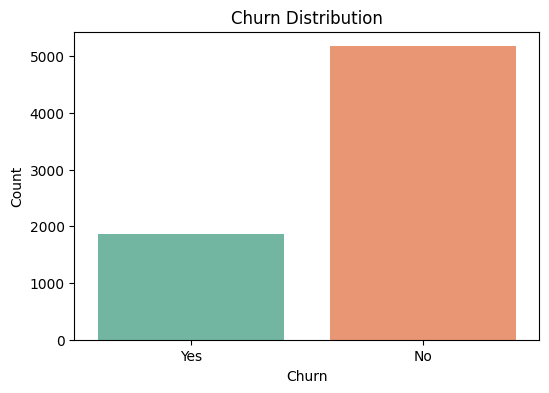

In [ ]:
churn_counts = customer_churn_df['Churn_Label'].value_counts()
churn_rate = churn_counts['Yes'] / churn_counts.sum() * 100

print("\nChurn Counts:\n", churn_counts)
print(f"\nChurn Rate: {churn_rate:.2f}%")

# Distribution of Churn (Yes/No)
plt.figure(figsize=(6,4))
sns.countplot(data=customer_churn_df, x='Churn_Label', hue='Churn_Label',palette='Set2',legend=False)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


**2. Is the target variable (Churn) balanced or imbalanced?**

In [229]:
if churn_rate < 30:
    balance_status = "Imbalanced (fewer churned customers)"
elif churn_rate > 70:
    balance_status = "Imbalanced (most customers churned)"
else:
    balance_status = "Fairly Balanced"
    
print(f"\nBalance Status: {balance_status}")


Balance Status: Imbalanced (fewer churned customers)


**3. Which churn value is more frequent?**

In [230]:
most_frequent_churn_value = customer_churn_df['Churn_Label'].mode()[0]
print("Most Frequent (mode):", most_frequent_churn_value)

Most Frequent (mode): No


- Churn Rate = 26.54%
- Imbalanced - (Yes = 26.5%, No = 73.5%)
- Most frequent Value = No

**Univariate Analysis**